In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def plot_img(img, title=None):
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    if title:
        plt.title(title)
    plt.axis('off')
    plt.show()

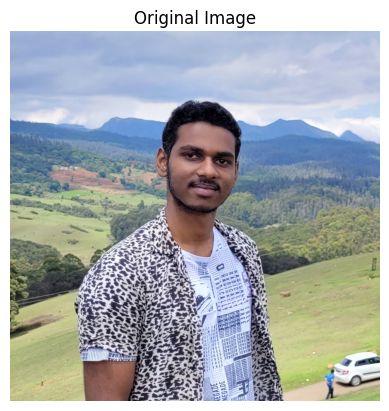

In [3]:
img = cv2.imread('Photo.jpg')
plot_img(img, 'Original Image')

# Blur

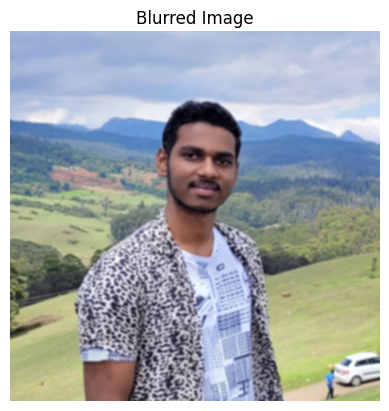

In [4]:
blurred_img = cv2.blur(img, (10, 10))
plot_img(blurred_img, 'Blurred Image')

# Gaussian Noise

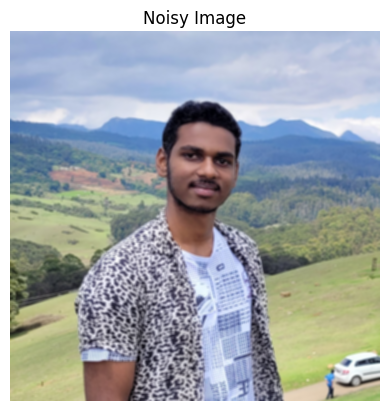

In [5]:
mean = 0
var = 0.1
sigma = var ** 0.5
gaussian = np.random.normal(mean, sigma, img.shape)
noisy = blurred_img + gaussian
noisy = np.clip(noisy, 0, 255)
noisy = np.uint8(noisy)
plot_img(noisy, 'Noisy Image')

# JPEG-2000 Compression

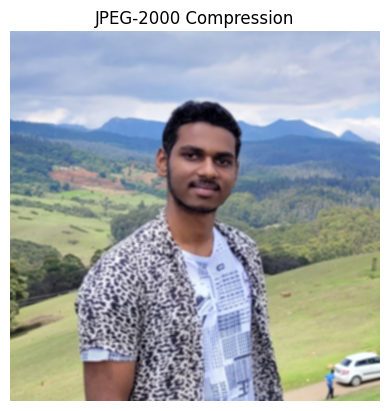

In [6]:
encode_param = [int(cv2.IMWRITE_JPEG2000_COMPRESSION_X1000), 75]
result, encimg = cv2.imencode('.jp2', noisy, encode_param)
decimg = cv2.imdecode(encimg, 1)
plot_img(decimg, 'JPEG-2000 Compression')

# PSNR

In [7]:
def psnr(img1, img2):
    mse = np.mean((img1 - img2) ** 2)
    PIXEL_MAX = 255.0
    return 10 * np.log10(PIXEL_MAX**2 / mse)

PSNR: 31.969180277571393


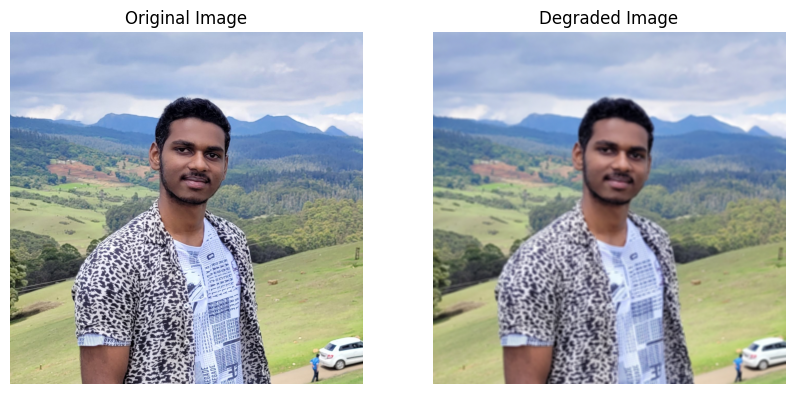

In [8]:
print('PSNR:', psnr(img, decimg))

# Plot Original vs Degraded side by side
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax[0].set_title('Original Image')
ax[0].axis('off')
ax[1].imshow(cv2.cvtColor(decimg, cv2.COLOR_BGR2RGB))
ax[1].set_title('Degraded Image')
ax[1].axis('off')
plt.show()